<a href="https://colab.research.google.com/github/EndarMuh/Machine_Learning_2023/blob/main/UAS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **UAS Machine Learning TI - 3F**

Dosen Pengampu : Vipkas Al Hadid Firdaus, S.T., M.T

Kelompok 4 :
1. Ahmad Bima Tristan Ibrahim (01/2141720055)
2. Arsyanda Irza Rabbani Yuardhino (6/2141720245)
3. Muhammad Endar Darmawan (21/2141720160)

# Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import cv2
import imutils
from tqdm import tqdm
from PIL import Image
from scipy.ndimage import median_filter
from skimage import filters
from skimage.morphology import binary_dilation, binary_erosion, square, erosion

# Import Model

In [ ]:
from keras.models import Sequential, load_model
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, LSTM, Reshape
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization, Flatten, Dense, ZeroPadding2D, Input
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils.contours import sort_contours

In [ ]:
from google.colab.patches import cv2_imshow
from google.colab import drive

# Method

## Resize Image

In [ ]:
def resize_data(row, height, width):
    return np.array(row).reshape(height, width)

## Dataset

In [ ]:
drive.mount('/content/drive')
DATA_DIR = './drive/MyDrive/ML_2023/UAS/'

data = pd.read_csv(DATA_DIR + 'typedCSV.csv').astype('float32')

Mounted at /content/drive


# Checking Data

In [ ]:
data.head(3)

,label,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,...,pixel 774,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783
0,0.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,253.0,...,250.0,255.0,255.0,251.0,255.0,255.0,255.0,255.0,255.0,255.0
1,0.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,254.0,255.0,255.0,255.0,249.0,253.0,255.0,255.0,255.0,255.0
2,0.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


In [ ]:
data.shape

(62992, 785)

## Check Label

In [ ]:
data['label'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61.], dtype=float32)

## Spill Label & Data

In [ ]:
labels = data['label']
data = data.drop('label', axis=1)

print("Data berhasil di-split dan drop")

print(f"Labels shape : {labels.shape}")
print(f"Data shape   : {data.shape}")

Data berhasil di-split dan drop
Labels shape : (62992,)
Data shape   : (62992, 784)


Kode di atas mengambil kolom 'label' dari DataFrame 'data', kemudian menghapus kolom tersebut, dan akhirnya mencetak informasi mengenai bentuk (shape) dari labels dan data setelah dilakukan operasi tersebut.

# Proses

## Print Sample Data

In [ ]:
random_indices = np.random.choice(data.index, 5, replace=False)

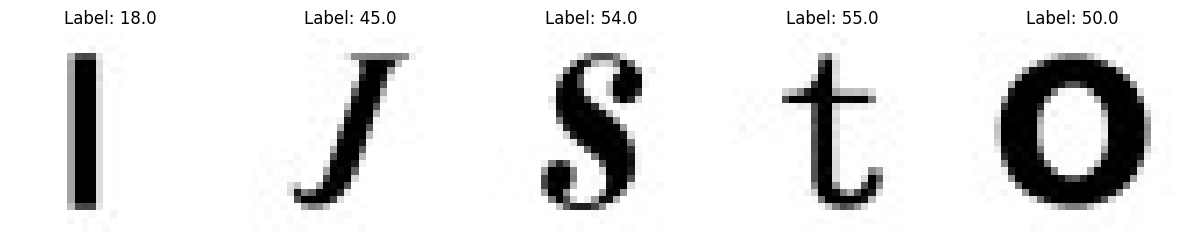

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, index in enumerate(random_indices):
    label = labels[index]
    pixels = data.loc[index].values.reshape(28, 28) # reshape

    axes[i].imshow(pixels, cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')  # Turn off axis labels

plt.show()

## Normalized Data

In [ ]:
data_normalized = data / 255.0

Kode di atas normalisasi data dengan membagi setiap nilai dalam DataFrame 'data' dengan 255.0, untuk mengonversi rentang nilai dari 0 hingga 255 menjadi rentang antara 0 dan 1.

In [ ]:
print("Normalized Data:")
data_normalized.head()

Normalized Data:


,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 774,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783
0,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.0,0.992157,0.992157,...,0.980392,1.0,1.000000,0.984314,1.000000,1.000000,1.0,1.0,1.0,1.0
1,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,...,0.996078,1.0,1.000000,1.000000,0.976471,0.992157,1.0,1.0,1.0,1.0
2,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.0,0.996078,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
3,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
4,1.0,0.992157,1.0,0.992157,0.984314,1.0,0.996078,1.0,1.000000,1.000000,...,1.000000,1.0,0.992157,0.992157,1.000000,1.000000,1.0,1.0,1.0,1.0


## Preprocessing

In [ ]:
data_thresholded = pd.DataFrame()

for index in data_normalized.index:
    pixels_normalized = data_normalized.loc[index].values.reshape(28, 28)  # reshape

    threshold_value = filters.threshold_otsu(pixels_normalized)
    binary_image = pixels_normalized > threshold_value

    data_thresholded = data_thresholded.append(pd.Series(binary_image.flatten()), ignore_index=True)

Output streaming akan dipotong hingga 5000 baris terakhir.
<ipython-input-15-191ee7bd4278>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_thresholded = data_thresholded.append(pd.Series(binary_image.flatten()), ignore_index=True)
<ipython-input-15-191ee7bd4278>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_thresholded = data_thresholded.append(pd.Series(binary_image.flatten()), ignore_index=True)
<ipython-input-15-191ee7bd4278>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_thresholded = data_thresholded.append(pd.Series(binary_image.flatten()), ignore_index=True)
<ipython-input-15-191ee7bd4278>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version.

Kode di atas membuat DataFrame baru, 'data_thresholded', yang berisi citra biner hasil thresholding dari setiap citra dalam DataFrame 'data_normalized'. Thresholding dilakukan menggunakan metode Otsu, di mana nilai ambang batasnya dihitung, dan setiap piksel dalam citra dinilai sebagai putih jika nilainya di atas ambang batas, dan hitam jika di bawah ambang batas.

# Check Result

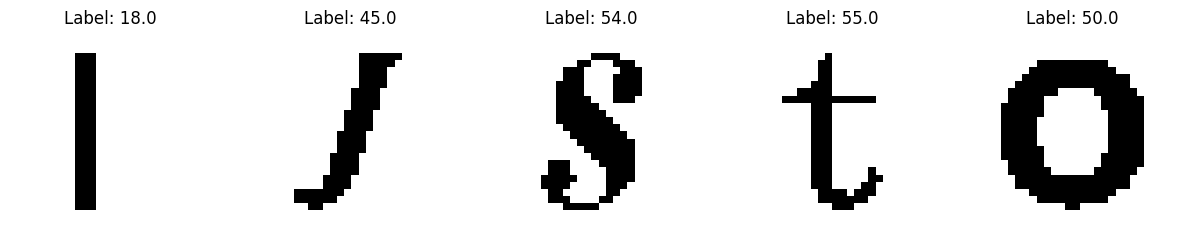

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Display thresholded images
for i, index in enumerate(random_indices):
    label = labels[index]
    pixels_thresholded = data_thresholded.loc[index].values.reshape(28, 28)  # Assuming it's a 28x28 image

    axes[i].imshow(pixels_thresholded, cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')  # Turn off axis labels

plt.show()

## Reshape

In [ ]:
data = np.array(data_thresholded.values.reshape(-1, 28, 28), dtype = 'float32')
data = np.expand_dims(data, axis=-1)

data.shape

(62992, 28, 28, 1)

Kode di atas mengubah DataFrame 'data_thresholded' menjadi array NumPy, kemudian direshape menjadi array tiga dimensi dengan ukuran (jumlah data, tinggi, lebar), dan akhirnya diexpand dimensi terakhirnya untuk membentuk array empat dimensi dengan ukuran (jumlah data, tinggi, lebar, saluran). Dengan demikian, bentuk akhir dari 'data' adalah (jumlah data, tinggi, lebar, saluran), dan hasilnya dicetak.

## Labels

In [ ]:
binarizer = LabelBinarizer()
labels = binarizer.fit_transform(labels)

In [ ]:
print(f"labels shape: {labels.shape}")

labels shape: (62992, 62)


Kode di atas menggunakan LabelBinarizer untuk mengonversi nilai-nilai kategori dalam variabel 'labels' menjadi representasi biner (one-hot encoding), di mana setiap nilai kategori direpresentasikan sebagai vektor biner.

## Training Process

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42, stratify=labels)

Kode di atas membagi dataset menjadi data latih (X_train dan y_train) serta data uji (X_test dan y_test) dengan menggunakan fungsi train_test_split. Pembagian dilakukan dengan proporsi data uji sebesar 30%, dan parameter stratify=labels digunakan untuk memastikan distribusi kategori dalam data latih dan uji tetap seimbang.

## Define Num Class

In [ ]:
num_classes = 62

Variabel num_classes menunjukkan jumlah kelas atau kategori yang ada dalam dataset. Dengan angka 62, dapat diasumsikan bahwa ada 62 kelas yang berbeda yang perlu diprediksi atau diidentifikasi dalam konteks aplikasi atau model yang sedang dibangun.

## Labels

In [ ]:
import string

alphabets = string.ascii_uppercase
alphabets_low = string.ascii_lowercase
numbers = string.digits
combined = numbers + alphabets + alphabets_low

print(combined)

0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz


Kode di atas membuat string combined yang berisi kombinasi angka (0-9), huruf besar (A-Z), dan huruf kecil (a-z) menggunakan modul string di Python. Hasilnya mencetak urutan karakter yang terdiri dari angka, huruf besar, dan huruf kecil.

In [ ]:
model = Sequential()

In [ ]:
inputs = Input(shape=(28, 28, 1))
conv_layer = ZeroPadding2D(padding=(3, 3))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
flatten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flatten)
fc_layer = Dense(64, activation='relu')(fc_layer)

Kode di atas mendefinisikan arsitektur model jaringan saraf konvolusi (CNN) menggunakan API Keras. Dimulai dengan layer input yang menerima tensor dengan bentuk (28, 28, 1). Selanjutnya, dilakukan padding, beberapa layer konvolusi (Conv2D), dan layer max pooling (MaxPooling2D). Setelah itu, dilakukan flatten untuk meratakan output dari layer konvolusi sebelumnya, dan diikuti oleh beberapa layer fully connected (Dense) dengan aktivasi ReLU.

In [ ]:
outputs = Dense(num_classes, activation='softmax')(fc_layer)

Kode di atas menambahkan layer output ke model. Layer output ini adalah Dense layer dengan jumlah unit (neuron) sesuai dengan num_classes (62, sesuai dengan nilai yang telah didefinisikan sebelumnya) dan menggunakan aktivasi softmax. Layer ini bertujuan untuk menghasilkan output probabilitas untuk setiap kelas dalam klasifikasi multi-kelas.

In [ ]:
adam = Adam(learning_rate=0.001)

In [ ]:
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

Model CNN dengan layer input, konvolusi, max pooling, dan fully connected, menggunakan pengoptimal Adam dengan tingkat pembelajaran 0.001, dikompilasi dengan fungsi kerugian categorical crossentropy dan metrik akurasi.

In [ ]:
history = model.fit(X_train, y_train, epochs=15, verbose=1, validation_data=(X_test, y_test))

Epoch 1/15
1378/1378 [==============================] - 54s 38ms/step - loss: 1.0219 - accuracy: 0.7056 - val_loss: 0.5968 - val_accuracy: 0.8054
Epoch 2/15
1378/1378 [==============================] - 55s 40ms/step - loss: 0.4900 - accuracy: 0.8291 - val_loss: 0.4627 - val_accuracy: 0.8357
Epoch 3/15
1378/1378 [==============================] - 52s 38ms/step - loss: 0.3928 - accuracy: 0.8530 - val_loss: 0.4080 - val_accuracy: 0.8554
Epoch 4/15
1378/1378 [==============================] - 53s 38ms/step - loss: 0.3306 - accuracy: 0.8726 - val_loss: 0.3808 - val_accuracy: 0.8595
Epoch 5/15
1378/1378 [==============================] - 55s 40ms/step - loss: 0.2923 - accuracy: 0.8840 - val_loss: 0.3680 - val_accuracy: 0.8660
Epoch 6/15
1378/1378 [==============================] - 51s 37ms/step - loss: 0.2656 - accuracy: 0.8932 - val_loss: 0.3460 - val_accuracy: 0.8744
Epoch 7/15
1378/1378 [==============================] - 51s 37ms/step - loss: 0.2397 - accuracy: 0.9019 - val_loss: 0.3668 -

## Predict

In [ ]:
predictions = model.predict(X_test)

591/591 [==============================] - 6s 10ms/step


Model menggunakan data uji (X_test) untuk membuat prediksi, dan hasilnya disimpan dalam variabel predictions.

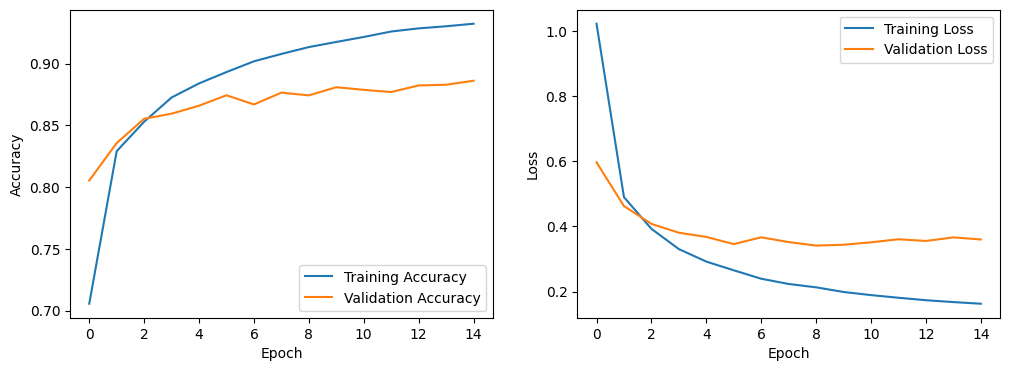

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Visualisasi Hasil Training

## Save Model

In [ ]:
model.save('model_ocr.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Test Predict

In [ ]:
from matplotlib.patches import Rectangle
from matplotlib import gridspec

In [ ]:
y_test_array = np.argmax(y_test, axis=1)

In [ ]:
random_indices = np.random.choice(len(X_test), 30, replace=False)

In [ ]:
def convert_label_to_category(label):
    if label < 10:
        return f"{label}"
    elif label < 36:
        uppercase_letter = chr(label - 10 + ord('A'))
        return f"{uppercase_letter}"
    else:
        lowercase_letter = chr(label - 36 + ord('a'))
        return f"{lowercase_letter}"

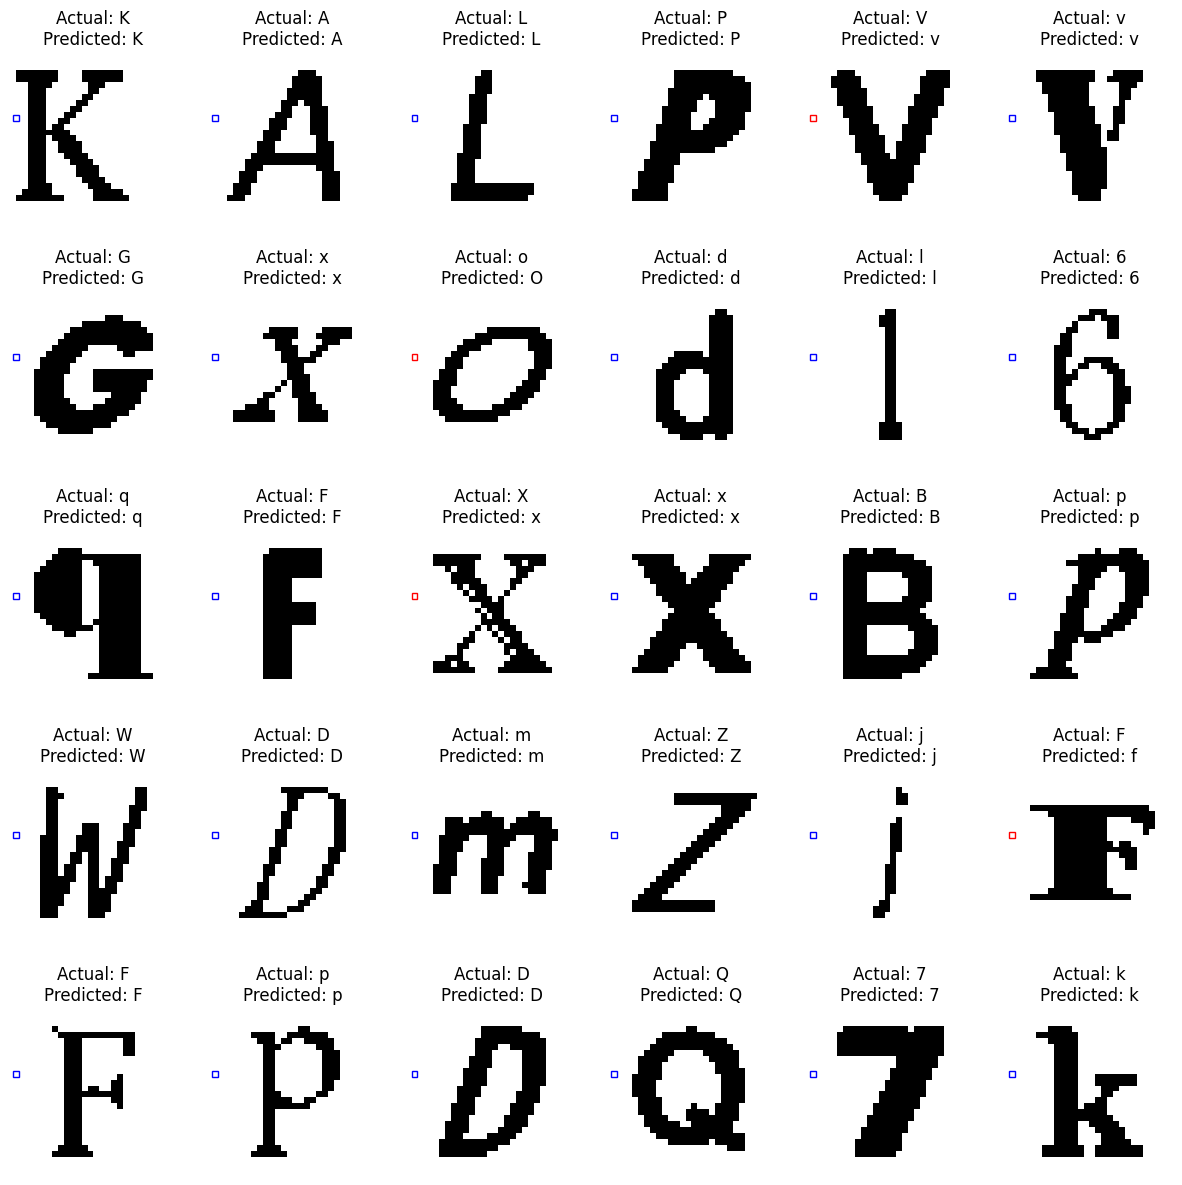

In [ ]:
fig, axes = plt.subplots(5, 6, figsize=(15, 15))

# Menggambar setiap data pada grid
for i, index in enumerate(random_indices):
    row, col = divmod(i, 6)
    actual_label = y_test_array[index]
    predicted_label = np.argmax(predictions[index])

    # Menentukan warna berdasarkan prediksi
    color = 'blue' if actual_label == predicted_label else 'red'

    # Menentukan warna yang serupa
    if convert_label_to_category(actual_label)[0] == convert_label_to_category(predicted_label)[0]:
        color = 'blue'

    # Menentukan kotak dan warna
    rect = Rectangle((0, 10), 1, 1, linewidth=1, edgecolor=color, facecolor='none')
    axes[row, col].add_patch(rect)

    # Menampilkan gambar
    axes[row, col].imshow(X_test[index].reshape(28, 28), cmap='gray')
    axes[row, col].set_title(f"Actual: {convert_label_to_category(actual_label)}\nPredicted: {convert_label_to_category(predicted_label)}")
    axes[row, col].axis('off')

plt.show()

Indikator kotak biru adalah tebakan benar, dan merah yang belum tepat

## Implementation Image

In [ ]:
# step 1
def cropping_image(image_path, threshold_value=210):
    """
    Extract the signature from an image.

    Parameters:
    - image_path (str): Path to the input image.
    - threshold_value (int): Threshold value for image thresholding (default is 210).

    Returns:
    - numpy.ndarray: Cropped image containing the signature.
    """
    # Load image
    img = cv2.imread(image_path)
    tes = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # convert to grayscale

    # Threshold to get just the signature (INVERTED)
    _, thresh_gray = cv2.threshold(gray, thresh=threshold_value, maxval=255, type=cv2.THRESH_BINARY_INV)

    contours, hierarchy = cv2.findContours(thresh_gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Find object with the biggest bounding box
    mx = (0, 0, 0, 0)  # biggest bounding box so far
    mx_area = 0
    for cont in contours:
        x, y, w, h = cv2.boundingRect(cont)
        area = w * h
        if area > mx_area:
            mx = x, y, w, h
            mx_area = area
    x, y, w, h = mx

    # Crop and show (without writing)
    roi = img[y:y+h, x:x+w]

    # Draw bounding box rectangle (debugging)
    cv2.rectangle(img, (x, y), (x+w, y+h), (200, 0, 0), 2)

    # Display the cropped image and original image with bounding box
    cv2_imshow(roi)

    return roi

# step 2
def increase_brightness(cropped_image):
  brig_image = cv2.convertScaleAbs(cropped_image,  alpha=1.64344482891196, beta=0)
  return brig_image

# step 3
def segmentation(brightened_image):
  # Mengubah citra ke skala abu-abu
  gray_img = cv2.cvtColor(brightened_image, cv2.COLOR_BGR2GRAY)

  # Menghitung threshold menggunakan metode Otsu
  _, binary_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

  # Proses smoothing dengan algoritma smearing
  kernel = np.ones((2,3), np.uint8)
  smoothed_img = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel)

  # Menentukan bagian baris menggunakan histogram
  row_histogram = np.sum(smoothed_img, axis=1)

  # Proses segmentasi baris
  _, segmented_img = cv2.threshold(smoothed_img, 1, 255, cv2.THRESH_BINARY)

  # Menampilkan hasil segmentasi baris
  cv2_imshow(segmented_img)

  return segmented_img

def rlsa_horizontal(img, threshold):
    result = img.copy()
    height, width = img.shape[:2]

    for y in range(height):
        count = 0
        for x in range(width):
            if img[y, x] == 255:  # Jika piksel putih
                count += 1
            else:  # Jika piksel hitam
                if count <= threshold:
                    result[y, x - count:x] = 0  # Smearing
                count = 0

        if count <= threshold:
            result[y, width - count:width] = 0  # Smearing

    return result

def rlsa_vertical(img, threshold):
    result = img.copy()
    height, width = img.shape[:2]

    for x in range(width):
        count = 0
        for y in range(height):
            if img[y, x] == 255:  # Jika piksel putih
                count += 1
            else:  # Jika piksel hitam
                if count <= threshold:
                    result[y - count:y, x] = 0  # Smearing
                count = 0

        if count <= threshold:
            result[height - count:height, x] = 0  # Smearing

    return result

Kode diatas merupakan gabungan beberapa fungsi, seperti Fungsi segmentasi citra pada gambar yang telah ditingkatkan kecerahannya. Ini mengonversi gambar ke skala abu-abu, menerapkan segmentasi ambang Otsu, melakukan penyemoothan menggunakan penutupan morfologis, menghitung histogram baris, dan kemudian melakukan segmentasi gambar berdasarkan ambang yang dihitung.

Lalu Fungsi RLSA secara horizontal dan vertikal secara berturut-turut. RLSA adalah teknik yang digunakan untuk segmentasi baris teks dalam gambar dokumen. Ini membantu menggabungkan atau memperluas komponen terhubung (baris teks) berdasarkan ambang batas yang ditentukan.

In [ ]:
def find_contours(img):
    conts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    conts = imutils.grab_contours(conts)
    conts = sorted(conts, key=lambda x: cv2.boundingRect(x)[1])  # Sort contours based on y-coordinate first
    conts = sorted(conts, key=lambda x: cv2.boundingRect(x)[0])  # Then, sort contours based on x-coordinate

    return conts

def extract_roi(img, x, y, w, h):
    roi = img[y:y+h, x:x+w]
    return roi

def thresholding(img):
    thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    return thresh

def resize_img(img, w, h):
    if w > h:
        resized = imutils.resize(img, width=28)
    else:
        resized = imutils.resize(img, height=28)

    (h, w) = resized.shape

    dX = int(max(0, 28 - w) / 2.0)
    dY = int(max(0, 28 - h) / 2.0)

    filled = cv2.copyMakeBorder(resized, top=dY, bottom=dY, right=dX, left=dX, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))
    filled = cv2.resize(filled, (28, 28))

    return filled

def normalization(img):
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=-1)
    return img


Fungsi cv2.findContours digunakan untuk menemukan kontur pada citra biner. Kontur kemudian diambil dan diurutkan berdasarkan koordinat y terlebih dahulu, kemudian diurutkan lagi berdasarkan koordinat x. Fungsi ROI yaitu Citra diberikan koordinat dan dimensi (x, y, w, h), dan fungsi ini mengembalikan bagian citra yang sesuai dengan ROI. Thresholding dilakukan menggunakan metode Otsu, yang menghasilkan citra biner terinvert. Untuk fungsi Normalization adalah Citra diubah menjadi tipe float32 dan dinormalisasi ke dalam rentang 0 hingga 1. Selanjutnya, dimensi citra diperluas untuk memenuhi persyaratan masukan model jaringan saraf tiruan.

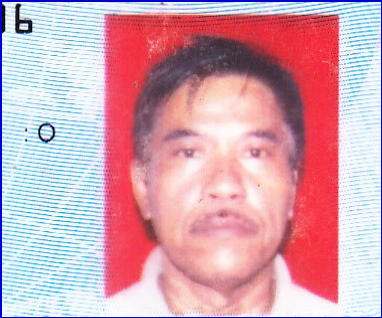

In [ ]:
ktp = '/content/drive/MyDrive/ML_2023/UAS/ktp6.png'
cropped_image = cropping_image(ktp)

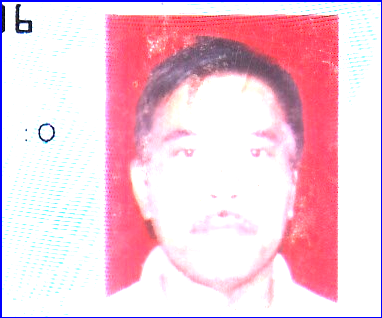

In [ ]:
brightened_image = increase_brightness(cropped_image)
cv2_imshow(brightened_image)

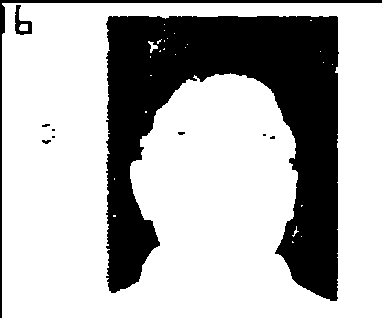

In [ ]:
segmented_image = segmentation(brightened_image)

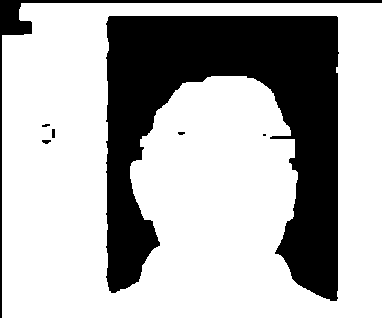

In [ ]:
horizontal_rlsa_img = rlsa_horizontal(segmented_image, 25)
rlsa_combined = rlsa_vertical(horizontal_rlsa_img, 5)
cv2_imshow(rlsa_combined)

  Kode diatas memberikan visualisasi dari citra yang telah melalui dua tahap Pemadatan Panjang Jalur, yaitu secara horizontal dan vertikal. Tujuan umum dari proses ini adalah untuk meningkatkan kohesivitas dan kelanjutan dari komponen teks dalam gambar, membantu dalam proses segmentasi teks pada citra.

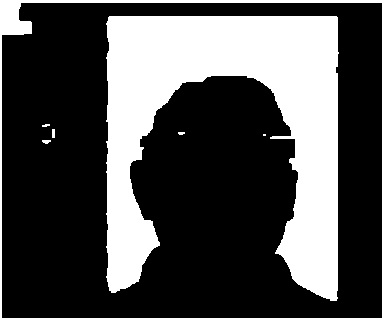

In [ ]:
rlsa_combined = 255 - rlsa_combined
cv2_imshow(rlsa_combined)

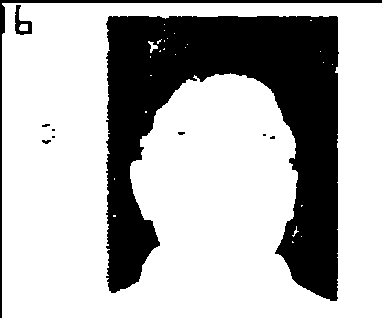

In [ ]:
img = cv2.imread('/content/drive/MyDrive/ML_2023/UAS/ktp.png')

(imh, imw, _) = img.shape

min_w, max_w = 10, imw
min_h, max_h = 10, 140
img_copy = segmented_image.copy()

# Find contours
conts = find_contours(rlsa_combined.copy())

# Inisialisasi variabel detected_char
detected_char = []

texts_roi = []

# Loop untuk deteksi bounding box dan ekstraksi karakter
for idx, c in enumerate(conts):
    (x, y, w, h) = cv2.boundingRect(c)

    if (w >= min_w and w <= max_w) and (h >= min_h and h <= max_h):
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 255, 255), 2)

        # Process the box and extract character
        roi = extract_roi(segmented_image, x, y, w, h)
        thresh = thresholding(roi)
        (h, w) = thresh.shape
        resized = resize_img(thresh, w, h)
        normalized = normalization(resized)

        detected_char.append((normalized, (x, y, w, h)))
        texts_roi.append(roi)

# Merge bounding boxes that are in the same row
merged_boxes = []
current_box = None

for box in detected_char:
    if current_box is None:
        current_box = box
    else:
        _, (x1, y1, w1, h1) = current_box
        _, (x2, y2, w2, h2) = box
        if y1 <= y2 <= y1 + h1:
            # Boxes are in the same row, merge them
            current_box = (np.concatenate([current_box[0], box[0]], axis=1), (min(x1, x2), min(y1, y2), max(x1 + w1, x2 + w2) - min(x1, x2), max(y1 + h1, y2 + h2) - min(y1, y2)))
        else:
            # Boxes are in different rows, append current_box and update current_box
            merged_boxes.append(current_box)
            current_box = box

# Append the last box
if current_box is not None:
    merged_boxes.append(current_box)

# Display the image with contours and merged bounding boxes
for box in merged_boxes:
    _, (x, y, w, h) = box
    cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2_imshow(img_copy)


Dilakukan loop untuk setiap kontur yang ditemukan. Bounding box ekstraksi karakter dibuat dengan memeriksa batasan lebar dan tinggi. Setiap bounding box yang memenuhi kriteria direktangle-kan pada citra img_copy.
Karakter diekstrak dari bounding box, di-threshold, di-resize, dan dinormalisasi. Informasi karakter dan bounding box disimpan dalam detected_char dan texts_roi. Loop dilakukan untuk menggabungkan kotak pembatas yang berada dalam baris yang sama. Setiap kotak pembatas yang berada dalam baris yang sama digabungkan menjadi satu kotak pembatas. Kotak pembatas yang telah digabungkan disimpan dalam merged_boxes.

In [ ]:
for roi in texts_roi:
  cv2_imshow(roi)

In [ ]:
for idx, roi in enumerate(texts_roi):
    img_tmp = 255 - roi  # Invert colors
    kernel = np.array([
        [0, 1, 0],
        [0, 1, 1],
        [0, 0, 0]
    ], np.uint8)

    # Dilate the inverted image
    res = cv2.erode(img_tmp, kernel, iterations=1)

    # Invert the result back
    res = 255 - res

    # Display the processed ROI
    cv2_imshow(res)

Sebuah kernel 3x3 diinisialisasi untuk digunakan dalam operasi erosi. Kernel ini didefinisikan sebagai matriks biner dengan pola tertentu, di mana piksel bernilai 1 menunjukkan area yang akan dihilangkan dalam operasi erosi. Kernel ini kemudian disimpan dalam variabel kernel.

In [ ]:
cv2_imshow(texts_roi[5])

IndexError: ignored

In [ ]:
# Load the cropped image
cropped_img = texts_roi[5]

# Apply adaptive thresholding to segment the characters
_, thresh = cv2.threshold(cropped_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image to draw contours and predictions
ktp_contours = cropped_img.copy()

# Sort contours based on x-coordinate
contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])

for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)

    # Adjust the size of the bounding box
    padding = 2
    x = max(0, x - padding)
    y = max(0, y - padding)
    w = min(cropped_img.shape[1], w + 1 * padding)
    h = min(cropped_img.shape[0], h + 1 * padding)

    # Crop the digit from the original image
    digit_img = cropped_img[y:y+h, x:x+w]

    # Display the cropped digit image
    cv2_imshow(digit_img)

    # Draw the bounding box and recognized digit on the copy of the original image
    cv2.rectangle(ktp_contours, (x, y), (x + w, y + h), (0, 255, 0), 2)